In [112]:
import json
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [44]:
typeIndexResultFile = "./data/type_index_result.json"
shapeIndexResultFile = "./data/shape_index_result.json"

In [45]:
typeIndexResult = None
shapeIndexResult = None

In [46]:
with open(typeIndexResultFile, 'rb') as rf:
    typeIndexResult = json.load(rf)
    
with open(shapeIndexResultFile, 'rb') as rf:
    shapeIndexResult = json.load(rf)

In [70]:
executionTimeTypeIndex = {}
executionTimeShapeIndex = {}
elementWithNotIdenticalResult = []

In [80]:
for queryName, versionData in typeIndexResult["data"].items():
    executionTimeTypeIndex[queryName] = {}
    for version, repetitionData in versionData.items():
        executionTimeTypeIndex[queryName][version] = []
        for i, repetition in enumerate(repetitionData):
            if(type(repetition)!=str):
                setResultTypeIndex = {e for l in repetition['results'] for e in l}
                setResultShapeIndex = {e for l in shapeIndexResult["data"][queryName][version][i]['results'] for e in l}
                
                executionTimeTypeIndex[queryName][version].append(repetition['execution_time'])
                executionTimeShapeIndex[queryName][version].append(shapeIndexResult["data"][queryName][version][i]['execution_time'])
                
                # Validate that the results are the same
                if setResultTypeIndex!= setResultShapeIndex :
                    elementWithNotIdenticalResult.append([queryName, version, i])
            else:
                executionTimeTypeIndex[queryName][version].append(-1)
                    
for queryName, versionData in shapeIndexResult["data"].items():
    executionTimeShapeIndex[queryName] = {}
    for version, repetitionData in versionData.items():
        executionTimeShapeIndex[queryName][version] = []
        for i, repetition in enumerate(repetitionData):
            if(type(repetition)!=str):
                executionTimeShapeIndex[queryName][version].append(shapeIndexResult["data"][queryName][version][i]['execution_time'])
            else:
                executionTimeShapeIndex[queryName][version].append(-1)
               


## Plot

In [180]:
indexLabel = ["C8_v{}".format(i) for i in range(0,5)]
indexLabel+= ["D1_v{}".format(i) for i in range(0,5)]
indexLabel+= ["D3_v{}".format(i) for i in range(0,5)]
indexLabel+= ["D4_v{}".format(i) for i in range(0,5)]
indexLabel+= ["D5_v{}".format(i) for i in range(0,5)]
indexLabel+= ["D6_v{}".format(i) for i in range(0,5)]
indexLabel+= ["D7_v{}".format(i) for i in range(0,5)]
indexLabel+= ["S1_v{}".format(i) for i in range(0,5)]
indexLabel+= ["S5_v{}".format(i) for i in range(0,5)]
indexes = np.arange(0,len(indexLabel),1)

In [188]:
queryNames = [
    "queries/parsed/interactive-complex-8.sparql.json",
    "queries/parsed/interactive-discover-1.sparql.json",
    "queries/parsed/interactive-discover-3.sparql.json",
    "queries/parsed/interactive-discover-4.sparql.json",
    "queries/parsed/interactive-discover-5.sparql.json",
    #"queries/parsed/interactive-discover-6.sparql.json",
    #"queries/parsed/interactive-discover-7.sparql.json",
    #"queries/parsed/interactive-short-1.sparql.json",
    #"queries/parsed/interactive-short-5.sparql.json"
]

/tmp/ipykernel_45424/1303956422.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (45,) and arg 1 with shape (5,).

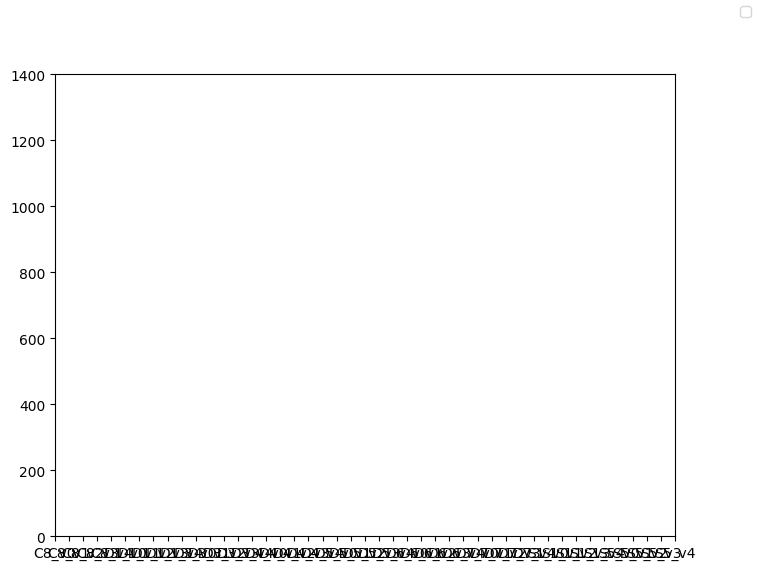

In [189]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yticks(np.arange(0, 1500, 200))
ax.set_xticks(indexes)
ax.set_xticklabels(indexLabel)
fig.legend()

for queryName in queryNames:

    queryName ="queries/parsed/interactive-discover-1.sparql.json"
    
    allDataShapeIndex = [data for label,data in executionTimeShapeIndex[queryName].items()]
    allDataTypeIndex = [data for label,data in executionTimeTypeIndex[queryName].items()]
    
    meansShapeIndex = [statistics.mean(data) for data in allDataShapeIndex]
    meansTypeIndex = [statistics.mean(data) for data in allDataTypeIndex]
    
    
    yerrShapeIndex = [[statistics.mean(data) for data in allDataShapeIndex], [statistics.mean(data) for data in allDataShapeIndex]]
    yerrTypeIndex = [[statistics.mean(data) for data in allDataTypeIndex], [statistics.mean(data) for data in allDataTypeIndex]]
    width = 0.25 
    
    ax.bar(indexes - width/2, meansShapeIndex, width = width, label='Shape Index')
    ax.bar(indexes + width/2, meansTypeIndex, width = width, label='Type Index')
